In [ ]:
import numpy
!pip install pygad
import pygad
import pygad.nn
import pygad.gann

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.6 MB/s 


In [ ]:
def fitness_func(solution, sol_idx):
  global GANN_instance, data_inputs, data_outputs
  predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],data_inputs=data_inputs)
  correct_predictions = numpy.where(predictions == data_outputs)[0].size
  solution_fitness = (correct_predictions/data_outputs.size)*100
  return solution_fitness

In [ ]:
def callback_generation(ga_instance):
    global GANN_instance
    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks,population_vectors=ga_instance.population)
    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Accuracy   = {fitness}".format(fitness=ga_instance.best_solution()[1]))

In [ ]:
data_inputs = numpy.array([[1, 1],
                           [1, 0],
                           [0, 1],
                           [0, 0]])

data_outputs = numpy.array([0, 
                            1, 
                            1, 
                            0])

In [ ]:
GANN_instance = pygad.gann.GANN(num_solutions=10,
                                num_neurons_input=2,
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["relu"],
                                output_activation="softmax")

In [ ]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

ga_instance = pygad.GA(num_generations=50, 
                       num_parents_mating=3, 
                       initial_population=population_vectors.copy(),
                       fitness_func=fitness_func,
                       mutation_percent_genes=5,
                       callback_generation=callback_generation)

ga_instance.run()


/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:503: UserWarning: The percentage of genes to mutate (mutation_percent_genes=5) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))
/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:764: UserWarning: Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
  if not self.suppress_warnings: warnings.warn("Starting from 

Generation = 1
Accuracy   = 100.0
Generation = 2
Accuracy   = 100.0
Generation = 3
Accuracy   = 100.0
Generation = 4
Accuracy   = 100.0
Generation = 5
Accuracy   = 100.0
Generation = 6
Accuracy   = 100.0
Generation = 7
Accuracy   = 100.0
Generation = 8
Accuracy   = 100.0
Generation = 9
Accuracy   = 100.0
Generation = 10
Accuracy   = 100.0
Generation = 11
Accuracy   = 100.0
Generation = 12
Accuracy   = 100.0
Generation = 13
Accuracy   = 100.0
Generation = 14
Accuracy   = 100.0
Generation = 15
Accuracy   = 100.0
Generation = 16
Accuracy   = 100.0
Generation = 17
Accuracy   = 100.0
Generation = 18
Accuracy   = 100.0
Generation = 19
Accuracy   = 100.0
Generation = 20
Accuracy   = 100.0
Generation = 21
Accuracy   = 100.0
Generation = 22
Accuracy   = 100.0
Generation = 23
Accuracy   = 100.0
Generation = 24
Accuracy   = 100.0
Generation = 25
Accuracy   = 100.0
Generation = 26
Accuracy   = 100.0
Generation = 27
Accuracy   = 100.0
Generation = 28
Accuracy   = 100.0
Generation = 29
Accuracy   = 

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:3345: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


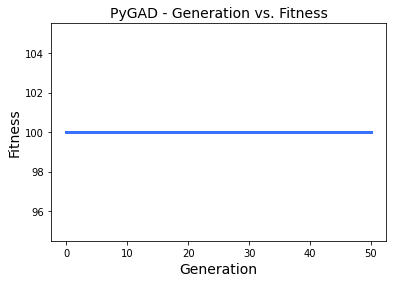

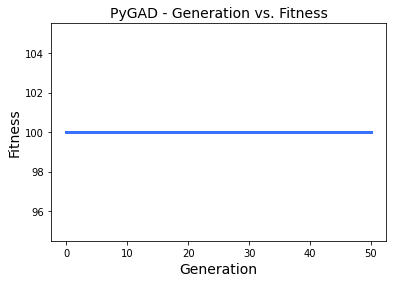

In [ ]:
ga_instance.plot_result()

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)
print(solution_fitness)
print(solution_idx)

[-0.84947514  0.02011527  0.1747163  -2.2775883  -1.32755748 -0.81670718
 -0.92835556  0.45286982]
100.0
0
